In [61]:
# 2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
## (1) 데이터 가져오기

# - sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

# - diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
df_X=diabetes.data
df_y=diabetes.target

# 데이터 모양 파악하기
print(f"당뇨병 환자 데이터 정보: {df_X.shape}")
print(f"타겟 데이터 정보: {df_y.shape}")

당뇨병 환자 데이터 정보: (442, 10)
타겟 데이터 정보: (442,)


In [78]:
## (2) 모델에 입력할 데이터 X 준비하기
# - df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
import numpy as np

# Use only one feature; 특정 샘플 가져오기
# # 참고: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# X = df_X[:, np.newaxis, 2]
    ## 하나만 가져와서 테스트를 해봤는데 W가 1이 되버림을 확인; 데이터셋이 가지고 있는 전체 feature를 다 쓰기 위해서 df_X는 그대로 사용하되 아래 코드에서 이미 X를 끌어다 쓰고 있어서 이름만 맞춰줌
X = df_X

# 타입확인
print(type(X))
# 값 확인
print(X)

<class 'numpy.ndarray'>
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [81]:
## (3) 모델에 예측할 데이터 y 준비하기
# - df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
    ### df_y가 1-dimension 구조의 numpy.ndarray 객체라서 변환하지 않아도 된다;로 이해중
# 타입확인
print(type(df_y))
# 값 확인
print(df_y)

<class 'numpy.ndarray'>
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  9

In [82]:
## (4) train 데이터와 test 데이터로 분리하기
# - X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
# test_size와 random_state는 우선 예제 그대로 따라해봄
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.2, random_state=42)

print("입력데이터 현황")
print(f"{X_train.shape}, {y_train.shape}")
print("정답 데이터 현황")
print(f"{X_test.shape}, {y_test.shape}")

입력데이터 현황
(353, 10), (353,)
정답 데이터 현황
(89, 10), (89,)


In [105]:
## (5) 모델 준비하기
# - 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요
    ## 10개의 랜덤 값을 W로, 하나의 상수값을 b로
W = np.random.rand(10)
b = np.random.rand()

print(f"가중치: {W}")
print(f"Bias: {b}")
# - 모델 함수를 구현해주세요; model() 예제 사용해봄
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

가중치: [0.02926158 0.82959502 0.08342443 0.96731642 0.30479544 0.30403436
 0.77998711 0.72358631 0.48336972 0.05856513]
Bias: 0.03591020085495833


In [112]:
# (6) 손실함수 loss 정의하기
# - 손실함수를 MSE 함수로 정의해주세요; 예제 참고함
def MSE(a, b):
    mse = ((a - b) ** 2).mean() # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


In [118]:
# (7) 기울기를 구하는 gradient 함수 구현하기
# - 기울기를 계산하는 gradient 함수를 구현해주세요; 예제 참고함
def gradient(X, W, b, y):
    N = len(y)  # N is counts of the data points

    # y_pred 준비
    y_pred = model(X, W, b)

    # gradient 공식 적용; 오차값 is y_pred - y
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # bdml gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [140]:
# (8) 하이퍼 파라미터인 학습률 설정하기
# - 학습률, learning rate를 설정해주세요
# - 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요
'''
    LEARNING RATE 테스트 (500회) & X_train
    0.0002 --> 9000 대 loss
    0.001 --> 6000 대 loss

    LEARNING RATE 테스트 (1000회) & X_train
    0.001 --> 5800 대 loss
    0.01 --> 4700 대 loss

    LEARNING RATE 테스트 (1000회) & X_test
    0.01 --> 4500 대 loss
'''
learning_rate = 0.01

10 회 반복: Loss 4204.0650
20 회 반복: Loss 4201.7241
30 회 반복: Loss 4199.3893
40 회 반복: Loss 4197.0607
50 회 반복: Loss 4194.7381
60 회 반복: Loss 4192.4216
70 회 반복: Loss 4190.1111
80 회 반복: Loss 4187.8067
90 회 반복: Loss 4185.5083
100 회 반복: Loss 4183.2158
110 회 반복: Loss 4180.9293
120 회 반복: Loss 4178.6488
130 회 반복: Loss 4176.3742
140 회 반복: Loss 4174.1055
150 회 반복: Loss 4171.8428
160 회 반복: Loss 4169.5858
170 회 반복: Loss 4167.3348
180 회 반복: Loss 4165.0896
190 회 반복: Loss 4162.8502
200 회 반복: Loss 4160.6165
210 회 반복: Loss 4158.3887
220 회 반복: Loss 4156.1667
230 회 반복: Loss 4153.9503
240 회 반복: Loss 4151.7397
250 회 반복: Loss 4149.5348
260 회 반복: Loss 4147.3356
270 회 반복: Loss 4145.1421
280 회 반복: Loss 4142.9542
290 회 반복: Loss 4140.7720
300 회 반복: Loss 4138.5954
310 회 반복: Loss 4136.4243
320 회 반복: Loss 4134.2589
330 회 반복: Loss 4132.0990
340 회 반복: Loss 4129.9447
350 회 반복: Loss 4127.7958
360 회 반복: Loss 4125.6525
370 회 반복: Loss 4123.5147
380 회 반복: Loss 4121.3824
390 회 반복: Loss 4119.2555
400 회 반복: Loss 4117.1341
410 회 반복:

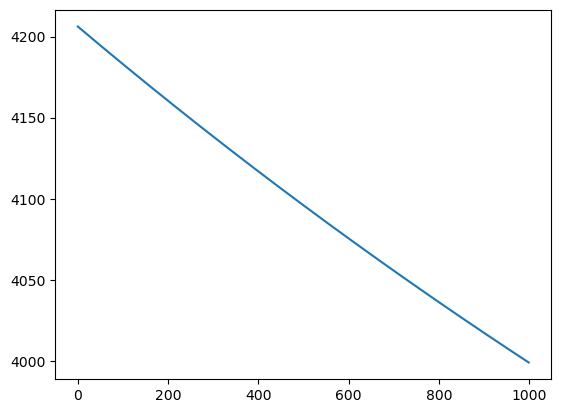

In [150]:
# (9) 모델 학습하기
# - 정의된 손실함수와 기울기 함수로 모델을 학습해주세요
# - loss값이 충분히 떨어질 때까지 학습을 진행해 주세요
# - 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요

## 오차값들을 저장할 list 선언
losses = []

for i in range(1, 1001):    # 500번 돌려보다가 1000번으로 교체함
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)

    # 10회마다 학습 현황 체크; 예제 참고함
    if i % 10 == 0:
        print('%d 회 반복: Loss %0.4f' % (i, L))

import matplotlib.pyplot as plt
# Loss율 그래프로 시각화
plt.plot(losses)
plt.show()

In [153]:
# (10) test 데이터에 대한 성능 확인하기
# - test 데이터에 대한 성능을 확인해주세요
## 예제 참고함
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3359.1137845463477

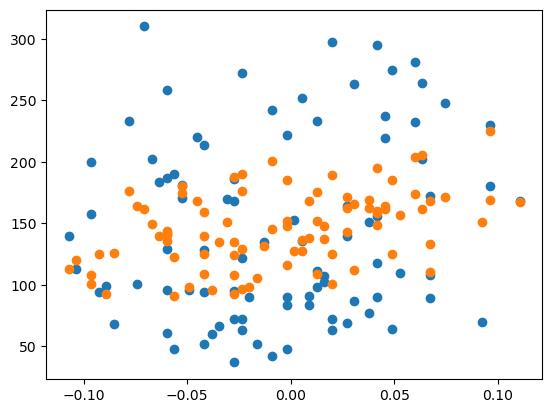

In [155]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
# - x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해주세요
## 예제 참고함
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()